<style>
    .custom-hr {
        border: none;
        height: 1.2px;
        background-color: #a61c00;
        margin: 20px 0;
    }
</style>
<div style="text-align: center;">
    <h1 style="color: black; font-size: 1.8em;"><em><strong>SModelS V3.0.0 beta</strong></em></h1>
</div>
<hr class="custom-hr">
<div style="text-align: left;">
    <p style="font-size: 0.8em;"><em>Yoxara Sánchez Villamizar (<a href="https://fisica.ufabc.edu.br/pt/" target="_blank">UFABC</a> &amp; <a href="http://sprace.org.br/" target="_blank">SPRACE</a>)</em></p>
    <p style="font-size: 1em;"><em>pp → Zp → jj</em></p>
</div>


In [1]:
from smodels.experiment.databaseObj import Database
database = Database("official+fastlim")
print(database)

WARNING in databaseObj.fetchFromScratch() in 691: downloading the database from https://smodels.github.io/database/official300-beta and caching in /home/camila/.cache/smodels. If you want the pickled database file to be cached in a different location, set the environment variable SMODELS_CACHEDIR, e.g. to '/tmp'.


loading >...................................................done.


WARNING in databaseObj.fetchFromScratch() in 691: downloading the database from https://smodels.github.io/database/fastlim300-beta and caching in /home/camila/.cache/smodels. If you want the pickled database file to be cached in a different location, set the environment variable SMODELS_CACHEDIR, e.g. to '/tmp'.


loading >...................................................done.
Database version: 3.0.0-beta+fastlim
-------------------------------------
166 experimental results: 72 CMS, 94 ATLAS, 58 @ 8 TeV, 108 @ 13 TeV
876 datasets, 4589 txnames.



In [1]:
!runSModelS.py -V

3.0.0-beta


In [2]:
import time
import os
from smodels.experiment.expSMS import ExpSMS
from smodels.experiment.defaultFinalStates import finalStates
from smodels.experiment.databaseObj import Database
from smodels.base.smodelsLogging import setLogLevel
setLogLevel("debug")
from smodels.base.model import Model
from smodels.base.particle import Particle, MultiParticle

from __future__ import print_function
from smodels.decomposition import decomposer
from smodels.base.physicsUnits import fb, GeV, TeV
from smodels.matching.theoryPrediction import theoryPredictionsFor,TheoryPredictionsCombiner
from smodels.experiment.databaseObj import Database
from smodels.tools import coverage
from smodels.base.smodelsLogging import setLogLevel
from smodels.base import runtime
runtime.modelFile = 'smodels.share.models.ppZpjj'
from smodels.share.models.ppZpjj import BSMList
from smodels.share.models.SMparticles import SMList
setLogLevel("info")
print(Model)


<class 'smodels.base.model.Model'>


In [3]:
path = "/home/camila/smodels/smodels-database"
db = Database(path)

INFO in databaseObj.loadBinaryFile() in 526: loading binary db file /home/yoxara/smodels/smodels-database/db3.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 533: Loaded database from /home/yoxara/smodels/smodels-database/db3.pcl in 2.2 secs.


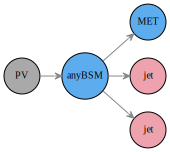

[PV, anyBSM, MET, jet, jet]
[(PV, anyBSM), (anyBSM, MET), (anyBSM, jet), (anyBSM, jet)]


In [4]:
elString = "[[['jet', 'jet']]]" 
el = ExpSMS.from_string(elString,model=finalStates)
el.draw()
print(el.nodes)
print(el.edges)

In [5]:
analysis_list = ['CMS-EXO-19-012', 'ATLAS-EXOT-2019-03', 'ATLAS-EXOT-2018-48', 'CMS-PAS-EXO-20-008']
results = db.selectExpResults(analysisIDs=analysis_list,dataTypes='upperLimit',txnames='TRV1qq',useNonValidated=True)
print(db)

Database version: 3.0.0-beta
-----------------------------
2 experimental results: 1 CMS, 1 ATLAS, 0 @ 8 TeV, 2 @ 13 TeV
2 datasets, 2 txnames.



In [10]:
#Y1_particle = Particle(label='Y1', isSM=False, pdg=5000001, eCharge=0, colordim=1, spin=1, _isInvisible=False)
#xd_particle = Particle(label='xd', isSM=False, pdg=5000521, eCharge=0, colordim=1, spin=0.5, _isInvisible=True)
#Y1 = MultiParticle('Y1', [Y1_particle, Y1_particle.chargeConjugate('Y1')])
#xd = MultiParticle('xd', [xd_particle, xd_particle.chargeConjugate('xd')])
#BSMList = [Y1, xd]
Y1 = Particle(label='Y1', isSM=False, pdg=5000001, eCharge=0, colordim=1, spin=1, _isInvisible=False)
xd = Particle(label='xd', isSM=False, pdg=5000521, eCharge=0, colordim=1, spin=0.5, _isInvisible=True)
BSMList = [Y1, xd]
#!smodelsTools.py slhachecker -f /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_18_tag_1.slha
#!smodelsTools.py lhechecker -f /home/yoxara/MG5_aMC_v3_5_1/xsec_ppZp_CMS_Exp/Events/run_01/tmp_0_unweighted_events.lhe

In [11]:
slhaFile = "/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/run_18_tag_1.slha"
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhaFile)

INFO in model.updateParticles() in 415: Loaded 2 BSM particles
INFO in model.setDecays() in 334: Particle(s) {-5000521} is not defined within model. Decay  0.4 [5000521, -5000521] will be ignored


In [13]:
# Set main options for decomposition
sigmacut = 0.5*fb
mingap = 5.*GeV

t0 = time.time()
# Decompose model
topDict = decomposer.decompose(model, sigmacut,
                               massCompress=True, invisibleCompress=True,
                               minmassgap=mingap)

# Access basic information from decomposition, using the topology list and topology objects:
print("\n Decomposition done in %1.2fm" %((time.time()-t0)/60.))
print("\n Decomposition Results: ")
print("\t  Total number of topologies: %i " % len(topDict))
nel = len(topDict.getSMSList())
print("\t  Total number of elements = %i " % nel)
# Print information about the m-th topology:
m = 2
if len(topDict) > m:
    cName = sorted(topDict.keys())[m]
    elementList = topDict[cName]
    print("\t\t %i topology  = " % cName)
    # Print information about the n-th element in the m-th topology:
    n = 0
    el = elementList[n]
    print("\t\t %i-th element  = " % (n), el, end="")
    print("\n\t\t\twith final states =", el.getFinalStates(), "\n\t\t\twith cross section =", el.weightList, "\n\t\t\tand masses = ", el.mass)


 Decomposition done in 0.00m

 Decomposition Results: 
	  Total number of topologies: 0 
	  Total number of elements = 0 
